# 7CS034 Data Science Group 15 Barabasi-Albert Model implementation

### Installing the NetworkX and Matplotlib libraries 

In [181]:
#pip install networkx
#pip install matplotlib
#pip install numpy

### Importing the Networkx and Matplotlib libraries

In [182]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

## Generating a random graph according to the Barabási–Albert preferential Attachment model.

A graph of n nodes is grown by attaching new nodes each with m Edges that are preferentially attached to existing nodes with high degree.

### Assign network parameters (m>=1 and m < n)

In [183]:
n = 250
m = 5

Where,
- n is the Number of nodes which is an integer value
- m is the Number of edges to attach from a new node to existing nodes
- G is the generated BA preferential attachment model Graph[3].

### Variables to be used

In [184]:
# Stores the number of nodes
n_row = n
# Stores the number of edges
n_edges = m
# initialize graph
G = nx.Graph()
G2 = nx.Graph()

### Barabasi Albert Model (Growth Phase + Preferential Attachment)

Limits is a list that stores floats between 0 and 1 which defines the probabaility range for each node to be chosen as a neighbor depending on its degree for ex: if limits[0] = 0 and limits[1] = 0.1 then the probability of choosing node 0 as a neighbors is 0.1 - 0

In [185]:
def barabasi_albert_graph(n, m, seed=None):
    # Add m initial nodes (m0 in barabasi-speak)
    G=empty_graph(m)
    G.name="barabasi_albert_graph(%s,%s)"%(n,m)
    # Target nodes for new edges
    targets=list(range(m))
    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes=[]
    # Start adding the other n-m nodes. The first node is m.
    source=m
    while source<n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip(*m,targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend(*m)
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachment)
        targets = _random_subset(repeated_nodes,m)
        source += 1
    return G

### Create Barabasi-Albert scale free graph

In [186]:
# Create the network graph
G= nx.barabasi_albert_graph(n,m)
# Get all the node positions of the graph
node_pos = nx.spring_layout(G) 

### Network plots

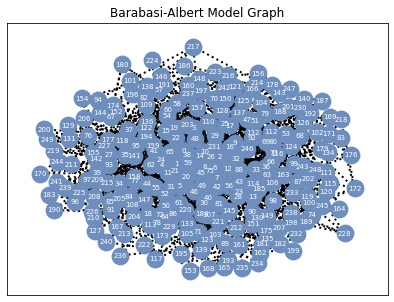

In [187]:
fig1 = plt.figure(figsize=(15, 5))
plt.clf()
plt.subplot(1,2,1)
plt.title('Barabasi-Albert Model Graph')
nx.draw_networkx_nodes(G, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=7, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
fig1.savefig("Network_plot_n" + str(n_row) + "_m" + str(m) + ".png")

## Topological Properties

### Degree of Distribution for each Node in the Network

<Figure size 432x288 with 0 Axes>

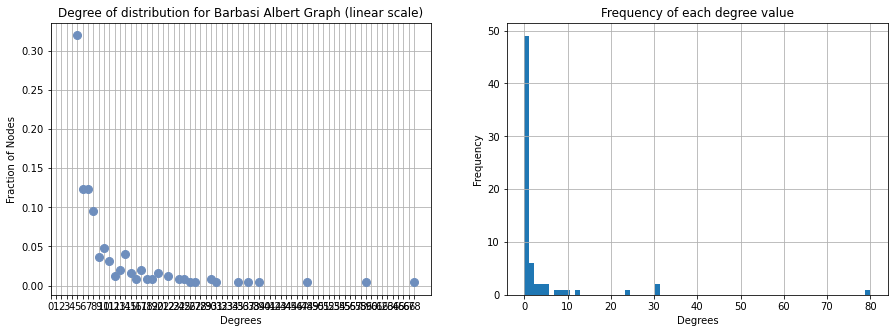

In [188]:
# Get the number of nodes 
nodes = float(nx.number_of_nodes(G))
# Create a dictionary containing all the nodes and its edge connection
degrees = dict(G.degree())
# To get the degree of distribution values
degree_values = sorted(set(degrees.values()))
# Get the number of unique connections made in the Network
for i in range(len(degree_values)):
    unique_connections = list(degrees.values()).count(degree_values[i]) 
    #print('Degree', degree_values[i], ': has', unique_connections, 'portion of Nodes in the Network.', '\n' )
    
node_portion = [list(degrees.values()).count(i)/float(nodes) for i in degree_values]
#print('Fraction of Nodes:', node_portion, '\n')
plt.clf()
fig6 = plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
# Plot the graph
plt.title('Degree of distribution for Barbasi Albert Graph (linear scale)')
plt.plot(degree_values, node_portion, linewidth=0, color='#6E8EBD', marker= 'o', markersize = 8)
plt.ylabel('Fraction of Nodes')
plt.xlabel('Degrees')
plt.xticks(np.arange(0, degree_values[len(degree_values)-1] + 1, 1))
plt.grid()
# Plot the frequency of each degree value
d1 = nx.degree_histogram(G)
plt.subplot(1,2,2)
plt.title('Frequency of each degree value')
plt.hist(d1, bins=len(d1))
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.grid()
plt.show()
fig6.savefig("DegreeDist_n" + str(n_row) + "_m" + str(m) + ".png")
#print('Frequency:', d1)

### Clustering Coefficient

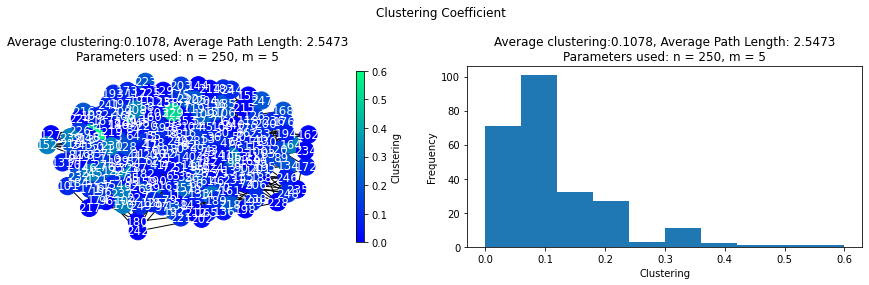

In [189]:
from matplotlib.cm import ScalarMappable

GC = G.subgraph(max(nx.connected_components(G)))
lcc = nx.clustering(GC)

cmap = plt.get_cmap('winter')
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in GC.nodes]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
nx.draw_spring(GC, node_color=node_colors, font_color='w', with_labels=True, ax=ax1)
fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)
ax1.set_title('Average clustering:' + str(round(nx.average_clustering(G), 4)) + ', ' 
              + 'Average Path Length: ' + str(round(nx.average_shortest_path_length(G), 4)) + '\n'
              + 'Parameters used: n = ' + str(n_row) + ', m = ' + str(n_edges))

ax2.hist(lcc.values(), bins=10)
ax2.set_xlabel('Clustering')
ax2.set_ylabel('Frequency')
ax2.set_title('Average clustering:' + str(round(nx.average_clustering(G), 4)) + ', ' 
              + 'Average Path Length: ' + str(round(nx.average_shortest_path_length(G), 4)) + '\n'
              + 'Parameters used: n = ' + str(n_row) + ', m = ' + str(n_edges))
fig.suptitle('Clustering Coefficient')
plt.tight_layout()
plt.show()
fig.savefig("Clustering_plot_n" + str(n_row) + "_m" + str(m) + ".png")

### Computting for the Shortest Path between two nodes

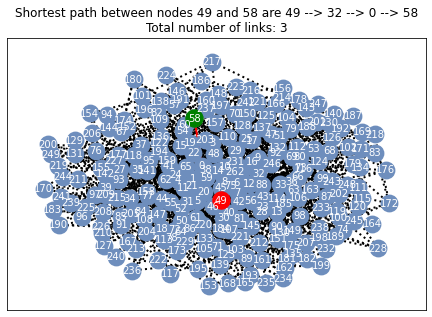

In [190]:
# https://stackoverflow.com/questions/57683321/edge-attributes-of-shortest-path-using-networkx
#Enter start node
st = 49 
#Enter end node
end = 58
# Gets the shortest between two nodes
path = nx.shortest_path(G)   
# Get a list of all the edges in the graph
path_edges = [list(u) for u in G.edges(data=False)]
# Creates the new edges list
n_edges = []
# Shortest path nodes
s_path = path[st][end]
# Convert shortest path list to string seperating each value with #
new_string = '#'.join(str(x) for x in s_path)
new_val = new_string
new_val2 = new_string[::-1]
# Get all the edge list between nodes
for i in range(len(path_edges)):
    n_path = path_edges[i]
    # Convert graph edges list to string seperating each value with #
    n_string = '#'.join(str(x) for x in n_path)
    # Check if the graph edges value is equal to shortest path values
    if  any(n_string.split('#')[1] == c for c in new_val.split('#')): 
        if any(n_string.split('#')[0] == c for c in new_val.split('#')):
            n_edges.append(n_path)

# Check if number of edges > 0
if len(n_edges) > 0:
    fig5 = plt.figure(figsize=(7.5, 5))
    plt.clf()
    nx.draw_networkx_nodes(G, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
    nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
    nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
    nx.draw_networkx_nodes(G,node_pos, nodelist=[st], node_color="r")
    nx.draw_networkx_nodes(G,node_pos, nodelist=[end], node_color="g")
    nx.draw_networkx_edges(G, node_pos, edgelist = n_edges, width=2.0, edge_color='r')
    # Check if the nodes is greater that 2
    if len(path[st][end]) > 2:
        plt.title('Shortest path between nodes ' + str(st) + ' and ' + str(end) 
                  + ' are ' + ' --> '.join(str(e) for e in (path[st][end])) 
                  + '\n' + 'Total number of links: ' + str(len(n_edges)))
    else:
        plt.title('Shortest path between nodes: No path found!' + '\n' + 'Total number of links: ' + str(len(n_edges)))
    fig5.savefig(str(st) + 's_' + str(end) +"e_ShortestPath_n" + str(n_row) + "_m" + str(m) + ".png")

### Finding the network size

In [191]:
print('Number of nodes in the graph', nx.number_of_nodes(G))

Number of nodes in the graph 250


### Finding number of edges in the graph

In [192]:
print('Number of edges in the graph', nx.number_of_edges(G))

Number of edges in the graph 1225


## Other network properties

### Removing a Node from the network (Betweenness)

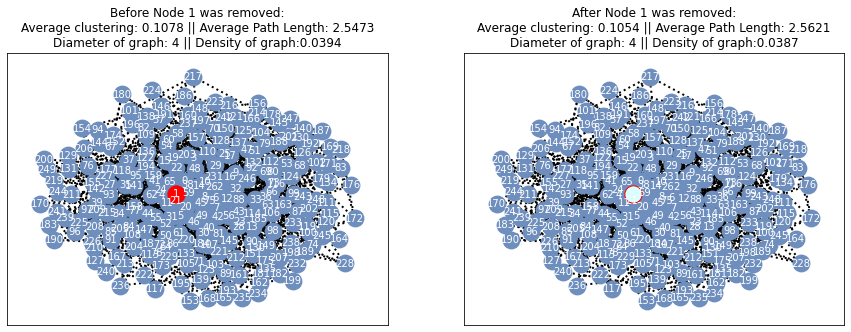

In [193]:
G2 = G
# Enter node id to be removed
node_id = 1

fig2 = plt.figure(figsize=(15, 5))
plt.clf()
plt.subplot(1, 2, 1)
plt.title('Before Node ' + str(node_id) + ' was removed:' + '\n' 
          + 'Average clustering: ' + str(round(nx.average_clustering(G), 4)) + ' || ' 
          + 'Average Path Length: ' + str(round(nx.average_shortest_path_length(G), 4)) + '\n' 
          + 'Diameter of graph: ' + str(nx.diameter(G)) + ' || ' 
          + 'Density of graph:' + str(round(nx.density(G2), 4)))
nx.draw_networkx_nodes(G, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G,node_pos, nodelist=[node_id], node_color="r")
before = list(G.edges)
G2.remove_node(node_id)
after = list(G2.edges)
plt.subplot(1, 2, 2)
plt.title('After Node ' + str(node_id) + ' was removed:' + '\n' 
          + 'Average clustering: ' + str(round(nx.average_clustering(G2), 4)) + ' || ' 
          + 'Average Path Length: ' + str(round(nx.average_shortest_path_length(G2), 4)) + '\n' 
          + 'Diameter of graph: ' + str(nx.diameter(G2)) + ' || ' 
          + 'Density of graph:' + str(round(nx.density(G2), 4)))

nx.draw_networkx_nodes(G2, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G2, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G2, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G2,node_pos, nodelist=[node_id], edgecolors="r", node_color="#D9FFFFFF")

fig2.savefig("Network_betweenness_n" + str(n_row) + "_m" + str(m) + ".png")

### Degree centrality

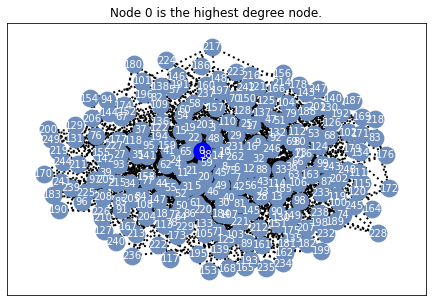

In [194]:
all_centr = dict(nx.degree_centrality(G))
keys_values = [key for key in all_centr.keys()]
obj_values = [all_centr[key] for key in keys_values]
highest_degr = keys_values[np.argmax(np.array(obj_values))]
fig3 = plt.figure(figsize=(7.5, 5))
plt.clf()
nx.draw_networkx_nodes(G, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G,node_pos, nodelist=[highest_degr], node_color="b")
plt.title('Node ' + str(highest_degr) + ' is the highest degree node.')
fig3.savefig("Higest_Degree_node_" + str(n_row) + "_m" + str(m) + ".png")

### Finding the graphs density

In [195]:
print('Density of graph:', nx.density(G))

Density of graph: 0.038670812281383596


### Raduis and diameter of the graph

In [196]:
print('Diameter of the graph: ' + str(nx.diameter(G)) + ', Raduis of graph: ' + str(nx.radius(G, e=None)))

Diameter of the graph: 4, Raduis of graph: 3


### Eccentrity

In [197]:
# eccentrity of node 2 & 5
print(dict(nx.eccentricity(G, v=[2, 5])))

{2: 3, 5: 3}


### Betweenness centrality

In [198]:
print(nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None))

{0: 0.15034008387126557, 2: 0.05690806862715865, 3: 0.006933156528827267, 4: 0.03026952309177669, 5: 0.007461512835339793, 6: 0.07615079397358226, 7: 0.11233394533792002, 8: 0.019295329461611017, 9: 0.03444449306700825, 10: 0.024035260747386416, 11: 0.01820954328814294, 12: 0.05853336616105288, 13: 0.007208807563500176, 14: 0.029077323385138458, 15: 0.014690153752903185, 16: 0.028150474609739243, 17: 0.007608117607488941, 18: 0.00818855274527612, 19: 0.01662861699789097, 20: 0.045925287729112994, 21: 0.04062051143091714, 22: 0.021457676464493168, 23: 0.019621470343843924, 24: 0.03243995448331485, 25: 0.006079169651668691, 26: 0.014238894377729943, 27: 0.00862488975826056, 28: 0.01917772254155711, 29: 0.009407214104862182, 30: 0.010201549391108946, 31: 0.023673905372266445, 32: 0.01697669694852314, 33: 0.014622381804866377, 34: 0.0009349063471800692, 35: 0.0032007942578429647, 36: 0.010449638228660454, 37: 0.003593765641102142, 38: 0.013441098817038637, 39: 0.00314830330652827, 40: 0.02

### Closeness centrality

In [199]:
print(nx.closeness_centrality(G, u=None, distance=None, wf_improved=True))

{0: 0.5701149425287356, 2: 0.5092402464065708, 3: 0.43661971830985913, 4: 0.46441947565543074, 5: 0.44206773618538325, 6: 0.5344827586206896, 7: 0.5511111111111111, 8: 0.453382084095064, 9: 0.484375, 10: 0.4679245283018868, 11: 0.47692307692307695, 12: 0.5092402464065708, 13: 0.4290657439446367, 14: 0.484375, 15: 0.4567219152854512, 16: 0.4696969696969697, 17: 0.4261168384879725, 18: 0.418212478920742, 19: 0.4484629294755877, 20: 0.4979919678714859, 21: 0.4910891089108911, 22: 0.44206773618538325, 23: 0.4509090909090909, 24: 0.4412811387900356, 25: 0.41333333333333333, 26: 0.4358523725834798, 27: 0.4217687074829932, 28: 0.45255474452554745, 29: 0.4268502581755594, 30: 0.42980935875216636, 31: 0.45255474452554745, 32: 0.4584103512014787, 33: 0.44206773618538325, 34: 0.4119601328903654, 35: 0.3887147335423197, 36: 0.4343257443082312, 37: 0.40924092409240925, 38: 0.4381625441696113, 39: 0.4196277495769882, 40: 0.4452423698384201, 41: 0.4105960264900662, 42: 0.43130434782608695, 43: 0.4320

### Edgebetweenness

In [200]:
print(nx.edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None))

{(0, 2): 0.005179191810463148, (0, 3): 0.0031360855058312955, (0, 4): 0.005315204251266332, (0, 5): 0.0026481390665493627, (0, 6): 0.0046263932400327345, (0, 7): 0.005654975380144423, (0, 8): 0.004971062664343805, (0, 9): 0.004294555953089663, (0, 10): 0.003865314341529387, (0, 11): 0.003473097720682309, (0, 12): 0.004922138868192239, (0, 13): 0.004066959393891382, (0, 14): 0.0037979413101225617, (0, 15): 0.0032158834869399637, (0, 16): 0.005384061332125349, (0, 19): 0.003709312057524074, (0, 20): 0.005472081858317976, (0, 21): 0.005285096642520892, (0, 22): 0.006307068912304531, (0, 23): 0.005164889798367889, (0, 25): 0.004047837356439819, (0, 27): 0.0038258024284626505, (0, 28): 0.0056931058100888965, (0, 30): 0.004473160487842261, (0, 32): 0.00449742160662927, (0, 34): 0.0027067034018625064, (0, 39): 0.0033698670853664287, (0, 54): 0.00361777226104618, (0, 56): 0.004647875559184617, (0, 58): 0.004150255662623359, (0, 59): 0.003641513948780768, (0, 62): 0.0038813605361847567, (0, 66)

### Transitivity

In [201]:
print(nx.transitivity(G))

0.0820879120879121


### Finding a node neighbors and non neighbors

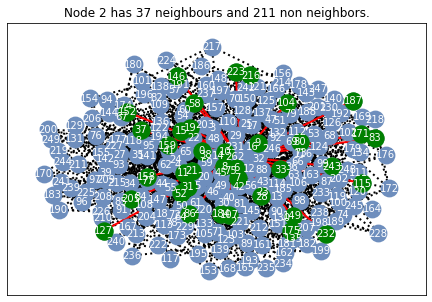

In [202]:
node_id = 2
#https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html
dict_value = nx.all_neighbors(G, node_id)
list_value = [item for item in dict_value]
# Non neighbors
dict_value_non = nx.non_neighbors(G, node_id)
list_value_non = [item for item in dict_value_non]
# get the links
new_edges = []
for n in list_value:
    new_edges.append([n, node_id])
                      
if len(new_edges) > 0:
    fig4 = plt.figure(figsize=(7.5, 5))
    plt.clf()
    nx.draw_networkx_nodes(G, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
    nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
    nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
    nx.draw_networkx_nodes(G,node_pos, nodelist=list_value, node_color="g")
    nx.draw_networkx_edges(G, node_pos, edgelist = new_edges, width=2.0, edge_color='r')
    plt.title('Node ' + str(node_id) + ' has ' + str(len(list_value)) + ' neighbours and ' 
              + str(len(list_value_non)) + ' non neighbors.')
    fig4.savefig(str(node_id) + "_Neighbours_n" + str(n_row) + "_m" + str(m) + ".png")

### Finding the common neighbors for two nodes

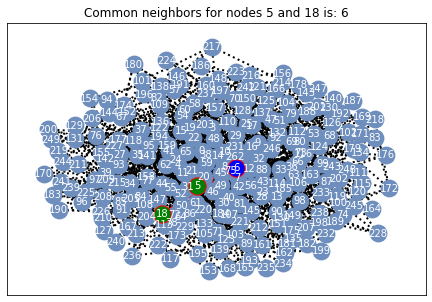

In [203]:
first_node = 5
second_node = 18

common = nx.common_neighbors(G, first_node, second_node)
common_list = [item for item in common]
# get the links
new_edges = []
for n in common_list:
    new_edges.append([first_node, n])
    new_edges.append([second_node, n])
    
fig7 = plt.figure(figsize=(7.5, 5))
plt.clf()
nx.draw_networkx_nodes(G, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G,node_pos, nodelist=[first_node], edgecolors="r", node_color="g")
nx.draw_networkx_nodes(G,node_pos, nodelist=[second_node], edgecolors="r", node_color="g")
nx.draw_networkx_nodes(G,node_pos, nodelist=common_list, edgecolors="r", node_color="b")
nx.draw_networkx_edges(G, node_pos, edgelist = new_edges, width=2.0, edge_color='r')
if len(common_list) > 0:
    plt.title('Common neighbors for nodes ' + str(first_node) + ' and ' + str(second_node) + 
              ' is: ' + ', '.join(str(e) for e in common_list))
else:
    plt.title('Common neighbors for nodes ' + str(first_node) + ' and ' + str(second_node) + 
              ' is: ' + 'None')
fig7.savefig(str(first_node) + '_' + str(second_node) + "Common_Neighbours_n" + str(n_row) + "_m" + str(m) + ".png")

### Size of the network

In [204]:
# Get the number of nodes 
nodes = float(nx.number_of_nodes(G))
print('Total number of nodes on the graph:', nodes)

Total number of nodes on the graph: 249.0


### Network Nodes Characteristics

In [205]:
# Get the dictionary keys
dict_keys = list(degrees.keys())
# Get the dictionary objects
dict_objs = [degrees[key] for key in degrees.keys()]

new_array = np.array(dict_objs)
max_index = np.argmax(new_array)

print('Nodes and the number of edges made to an existing Node in the network:', '\n')
print('Node ID:','\n', dict_keys, '\n')
print('Number of Edges:','\n', dict_objs, '\n')
print('Node', dict_keys[max_index], 'has the higest number of connected edges of value',new_array[max_index])

Nodes and the number of edges made to an existing Node in the network: 

Node ID: 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 

### Adjacency matrix

In [206]:
# https://www.slideshare.net/rik0/complex-and-social-network-analysis-in-python/9-Average_geodesic_distance_i_n
# Get the matrix values
A = nx.to_numpy_matrix(G)
A

matrix([[0., 1., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Average path length

In [207]:
average_shortest_path = nx.average_shortest_path_length(G)
print('Average length of shortest path:', average_shortest_path)

Average length of shortest path: 2.5621194455240315


### Clustering and Clustering Coefficient

In [208]:
print(nx.clustering(G))

{0: 0.07055630936227951, 2: 0.07807807807807808, 3: 0.16666666666666666, 4: 0.052307692307692305, 5: 0.14285714285714285, 6: 0.0851063829787234, 7: 0.0750151240169389, 8: 0.09473684210526316, 9: 0.10541310541310542, 10: 0.11956521739130435, 11: 0.11904761904761904, 12: 0.07152496626180836, 13: 0.2, 14: 0.11666666666666667, 15: 0.10526315789473684, 16: 0.07509881422924901, 17: 0.054945054945054944, 18: 0.11538461538461539, 19: 0.1, 20: 0.058823529411764705, 21: 0.06896551724137931, 22: 0.06842105263157895, 23: 0.04285714285714286, 24: 0.029556650246305417, 25: 0.2, 26: 0.08187134502923976, 27: 0.0989010989010989, 28: 0.1111111111111111, 29: 0.09523809523809523, 30: 0.10989010989010989, 31: 0.057971014492753624, 32: 0.09558823529411764, 33: 0.06535947712418301, 34: 0.4666666666666667, 35: 0.10714285714285714, 36: 0.14285714285714285, 37: 0.16666666666666666, 38: 0.09558823529411764, 39: 0.3333333333333333, 40: 0.07792207792207792, 41: 0.0380952380952381, 42: 0.09558823529411764, 43: 0.06

### List of Connected Nodes

In [209]:
a = list(nx.connected_components(G))
print('List of connected components:', '\n', a)

List of connected components: 
 [{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

## Number of node neighbours in the network

In [210]:
print('Node positions:', '\n', node_pos)

Node positions: 
 {0: array([-0.09667813,  0.12387788]), 1: array([-0.14163733,  0.01707846]), 2: array([0.1039517 , 0.07625957]), 3: array([-0.04229058,  0.31522143]), 4: array([-0.22163869,  0.00483816]), 5: array([-0.11976761, -0.16590424]), 6: array([ 0.07956208, -0.01814327]), 7: array([ 0.08855214, -0.10027938]), 8: array([ 0.01936067, -0.00572278]), 9: array([0.19350275, 0.18932211]), 10: array([0.02304936, 0.11347331]), 11: array([-0.19021065, -0.06223269]), 12: array([ 0.15048172, -0.02602007]), 13: array([ 0.2923783 , -0.25879315]), 14: array([-0.01069646,  0.08264677]), 15: array([-0.2022034 ,  0.29339744]), 16: array([0.16437236, 0.16064407]), 17: array([0.16293235, 0.33901436]), 18: array([-0.3025681 , -0.40216965]), 19: array([-0.15610687,  0.3161899 ]), 20: array([-0.08556324, -0.09581067]), 21: array([-0.14762986, -0.0429059 ]), 22: array([-0.14030796,  0.23222259]), 23: array([ 0.21677006, -0.21838101]), 24: array([-0.22997686,  0.05431621]), 25: array([0.13439111, 0.3

### References

[1]https://networkx.org/

[2]https://www.tutorialspoint.com/python_data_science/python_matplotlib.htm

[3]https://www.geeksforgeeks.org/barabasi-albert-graph-scale-free-models/

[4]https://hal.archives-ouvertes.fr/hal-00940688/document

[5]https://stackoverflow.com/questions/64485434/how-to-plot-the-distribution-of-a-graphs-clustering-coefficient